<a href="https://colab.research.google.com/github/yeerdauleet/nosql_yerdaulet/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

model=tf.keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])

model.compile(optimizer='sgd',loss='mean_squared_error')
xs=np.array([-1.0,0.0,1.0,2.0,3.0,4.0],dtype=float)
ys=np.array([-4.0, 1.0, 6.0, 11.0, 16.0, 21.0], dtype=float)
model.fit(xs,ys,epochs=500)



Epoch 1/500
1/1 [==============================] - 0s 480ms/step - loss: 111.4615
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 87.7070
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 69.0178
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 54.3138
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 42.7450
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 33.6430
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 26.4818
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 20.8473
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 16.4142
Epoch 10/500
1/1 [==============================] - 0s 12ms/step - loss: 12.9261
Epoch 11/500
1/1 [==============================] - 0s 10ms/step - loss: 10.1817
Epoch 12/500
1/1 [==============================] - 0s 12ms/step - loss: 8.0222
Epoch 13/500
1/1 [======================

In [5]:
print(model.predict([3.0]))

1/1 [==============================] - 0s 44ms/step
[[16.000065]]


In [6]:
import matplotlib.pyplot as plt
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


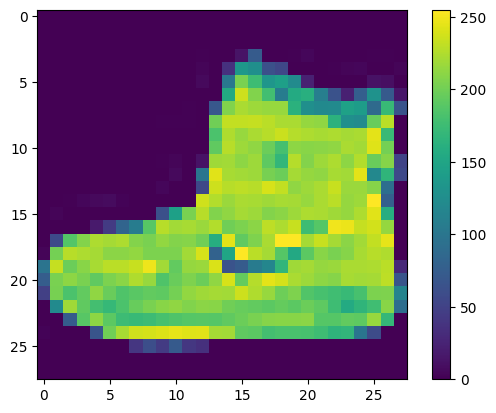

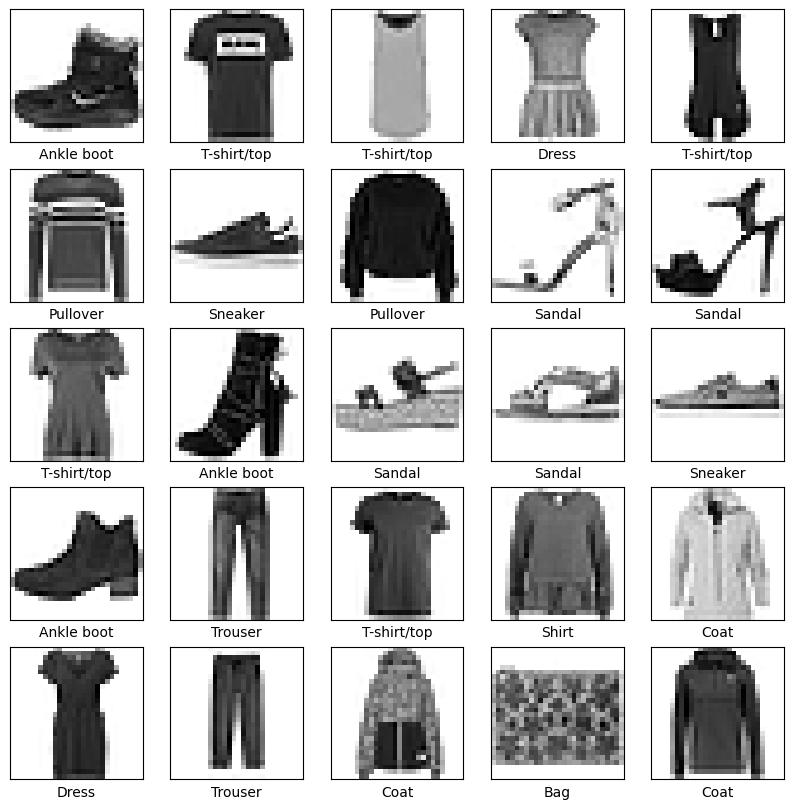

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
train_images = train_images / 255.0

test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=20)



Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4963 - accuracy: 0.8256
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3704 - accuracy: 0.8662
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3315 - accuracy: 0.8795
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3087 - accuracy: 0.8881
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2927 - accuracy: 0.8913
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2757 - accuracy: 0.8971
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2628 - accuracy: 0.9015
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2527 - accuracy: 0.9050
Epoch 9/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2443 - accuracy: 0.9097
Epoch 10/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.

In [14]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
np.argmax(predictions[0])

313/313 [==============================] - 1s 3ms/step


9

In [43]:
def plot_image(i,predictions_array,true_label,img):
  true_label,img= true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(20))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

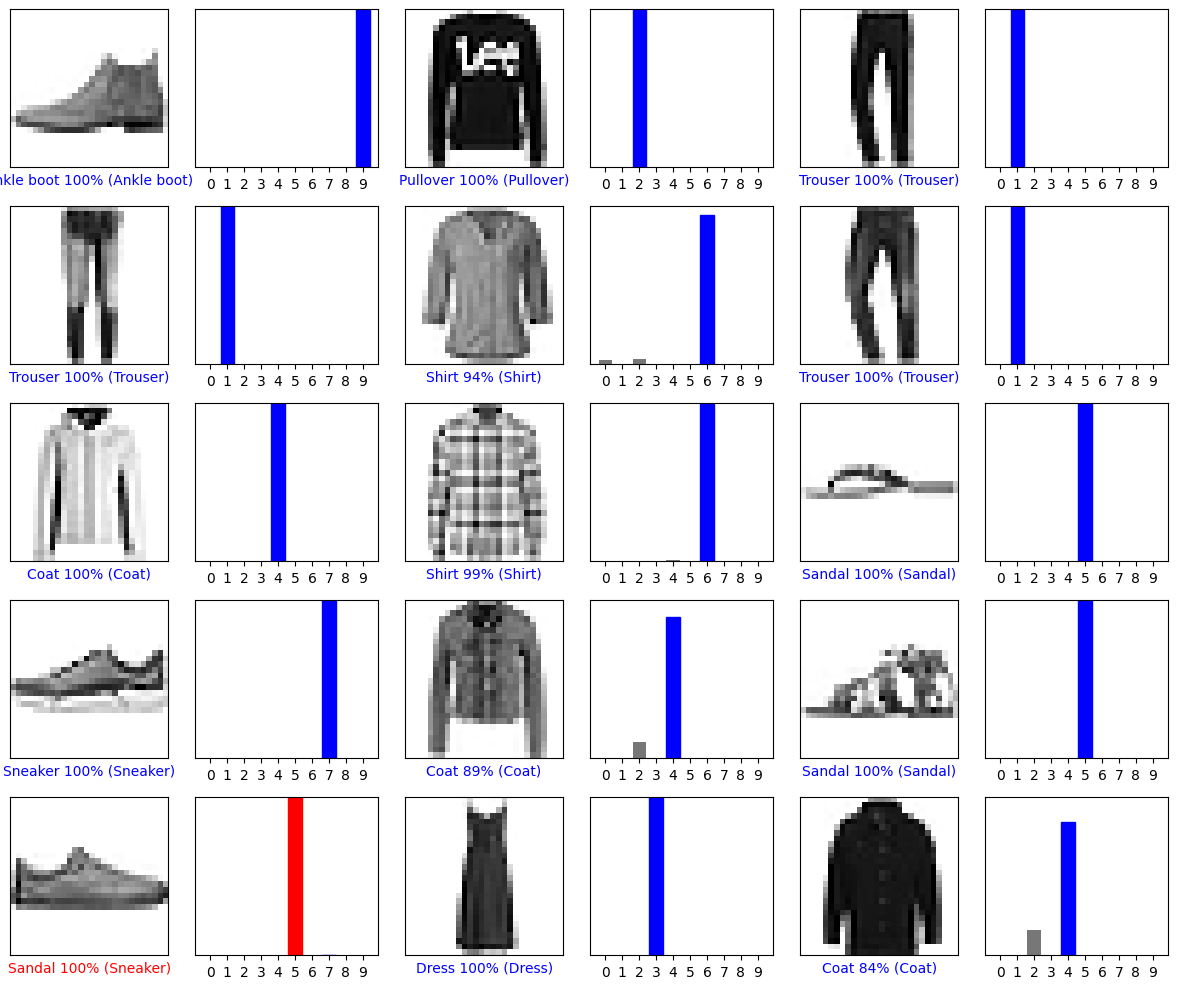

In [44]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()